In [1]:
import numpy as np
import pandas as pd

In [2]:
from statsmodels.tsa.arima_process import arma_generate_sample

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
df_ny=pd.read_csv('/Users/mahmoud/Zillow_Time_Series/ny_zillow_data.csv')

In [4]:
df_ny.shape

(114, 273)

In [5]:
df_ny = df_ny.drop(columns=['Unnamed: 0'])

In [6]:
df_ny

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
1,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
2,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
3,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
4,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,62122,11436,New York,NY,New York,Queens,8009,119000.0,119400.0,119900.0,...,383800,382200,381000,382500,385600,387600,388700,390600,395100,400300
110,62078,11366,New York,NY,New York,Queens,8304,231800.0,232000.0,232300.0,...,830000,839100,847800,854900,859600,861700,865600,871900,882700,893600
111,61783,10307,New York,NY,New York,Richmond,8388,186700.0,186800.0,186900.0,...,522000,525600,527900,533800,543300,550800,559300,566900,571600,575900
112,62075,11363,New York,NY,New York,Queens,9912,295000.0,296200.0,297700.0,...,1032000,1043700,1049800,1047900,1041200,1035400,1040700,1048600,1052100,1051300


In [7]:
# dropping Nans
df_ny = df_ny.dropna()

In [8]:
df_ny

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
1,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
2,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
3,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
5,61703,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,...,7410100,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,62122,11436,New York,NY,New York,Queens,8009,119000.0,119400.0,119900.0,...,383800,382200,381000,382500,385600,387600,388700,390600,395100,400300
110,62078,11366,New York,NY,New York,Queens,8304,231800.0,232000.0,232300.0,...,830000,839100,847800,854900,859600,861700,865600,871900,882700,893600
111,61783,10307,New York,NY,New York,Richmond,8388,186700.0,186800.0,186900.0,...,522000,525600,527900,533800,543300,550800,559300,566900,571600,575900
112,62075,11363,New York,NY,New York,Queens,9912,295000.0,296200.0,297700.0,...,1032000,1043700,1049800,1047900,1041200,1035400,1040700,1048600,1052100,1051300


In [9]:
df_ny.drop('RegionID', axis=1, inplace=True)

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
price_columns = df_ny.columns[6:-1]  # Exclude the 'RegionID' and 'Housing_Price_Growth' columns

df_ny['Housing_Price_Growth'] = df_ny['2018-04'] - df_ny['1996-04']

<ipython-input-10-c70e97226b6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['Housing_Price_Growth'] = df_ny['2018-04'] - df_ny['1996-04']


In [11]:
df_ny['Housing_Price_Growth']

0       265000.0
1       801200.0
2       832200.0
3       625700.0
5      3709900.0
         ...    
109     281300.0
110     661800.0
111     389200.0
112     756300.0
113     340300.0
Name: Housing_Price_Growth, Length: 104, dtype: float64

In [12]:
df_ny.head()

,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Housing_Price_Growth
0,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,...,400000,407300,411600,413200,414300,413900,411400,413200,417900,265000.0
1,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,163000.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,801200.0
2,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,251200.0,...,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600,832200.0
3,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,192000.0,...,777300,788800,793900,796000,799700,806600,810600,813400,816200,625700.0
5,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,3754600.0,...,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600,3709900.0


In [13]:
# # Identify the columns to keep as identifiers (e.g., non-date columns)
# id_vars = ['Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']

# # Perform the melt operation to convert to long format
# df_ny_long = pd.melt(df_ny, id_vars=id_vars, var_name='Date', value_name='Housing_Price_Growth')

# # Sort the DataFrame by 'Date' if desired
# df_ny_long.sort_values('Date', inplace=True)

In [37]:
df_ny_long = df_ny.drop(['City','State','Metro', 'CountyName', 'SizeRank', 
                      'Housing_Price_Growth'],axis=1)

In [38]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['Zipcode'], var_name='Date')
    melted['time'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [39]:
top5 = df_ny['Housing_Price_Growth'].nlargest(n=5)
top5

5     3709900.0
19    2018200.0
52    1571900.0
20    1490500.0
36    1452600.0
Name: Housing_Price_Growth, dtype: float64

In [40]:
df_ny_long = melt_data(df_ny_long).set_index('Date')
df_ny_long

,Zipcode,value,time
Date,,,
1996-04,10467,152900.0,1996-04-01
1996-04,11226,162000.0,1996-04-01
1996-04,11375,252400.0,1996-04-01
1996-04,11235,190500.0,1996-04-01
1996-04,10128,3676700.0,1996-04-01
...,...,...,...
2018-04,11436,400300.0,2018-04-01
2018-04,11366,893600.0,2018-04-01
2018-04,10307,575900.0,2018-04-01


In [25]:
dfs_ts = []
for zc in df_ny_long.Zipcode.unique():
    #Create separate dataframes for each zipcode with a monthly frequency.
    new_df = df_ny_long[df_ny_long['Zipcode']==zc].asfreq('MS')
    dfs_ts.append(new_df)

In [26]:
print('Time series data for the 5 zipcodes:\n',df_ny_long.head())

Time series data for the 5 zipcodes:
          Zipcode      value       time
Date                                  
1996-04    10467   152900.0 1996-04-01
1996-04    11226   162000.0 1996-04-01
1996-04    11375   252400.0 1996-04-01
1996-04    11235   190500.0 1996-04-01
1996-04    10128  3676700.0 1996-04-01


In [27]:
dfs_ts[1]

,Zipcode,value,time
Date,,,
1996-04-01,11226,162000.0,1996-04-01
1996-05-01,11226,162300.0,1996-05-01
1996-06-01,11226,162600.0,1996-06-01
1996-07-01,11226,163000.0,1996-07-01
1996-08-01,11226,163400.0,1996-08-01
...,...,...,...
2017-12-01,11226,887800.0,2017-12-01
2018-01-01,11226,890500.0,2018-01-01
2018-02-01,11226,901700.0,2018-02-01


In [92]:
df_ny.to_csv(r'/Users/mahmoud/Zillow_Time_Series/updated_ny.csv', index=False)

In [28]:
#Calculate monthly returns in new column 'ret' for each zipcode.
for zc in range(len(dfs_ts)):
    dfs_ts[zc]['monthly_return']=np.nan*len(dfs_ts[zc])
    for i in range(len(dfs_ts[zc])-1):
        dfs_ts[zc]['monthly_return'][i+1]= (dfs_ts[zc].value.iloc[i+1] / dfs_ts[zc].value.iloc[i]) - 1        

<ipython-input-28-77ae08bcfaba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_ts[zc]['monthly_return'][i+1]= (dfs_ts[zc].value.iloc[i+1] / dfs_ts[zc].value.iloc[i]) - 1


In [118]:
for i in range(5):
    results = adfuller(dfs_ts[i].monthly_return.dropna())
    print(f'ADFuller test p-value for zipcode: {dfs_ts[i].Zipcode[0]}')
    print('p-value:',results[1])
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 10467
p-value: 0.29750211679219907
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 11226
p-value: 0.10696152854895846
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 11375
p-value: 0.07813699698724906
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 11235
p-value: 0.31993563862689267
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 10128
p-value: 0.0056068076108168
Reject the null hypothesis. Data is stationary.



In [138]:
df_ny_long

,Zipcode,value,time
Date,,,
1996-04,10467,152900.0,1996-04-01
1996-04,11226,162000.0,1996-04-01
1996-04,11375,252400.0,1996-04-01
1996-04,11235,190500.0,1996-04-01
1996-04,10128,3676700.0,1996-04-01
...,...,...,...
2018-04,11436,400300.0,2018-04-01
2018-04,11366,893600.0,2018-04-01
2018-04,10307,575900.0,2018-04-01


In [141]:
test_data

,Zipcode,value,time
Date,,,
2018-01,10467,413900.0,2018-01-01
2018-01,11226,890500.0,2018-01-01
2018-01,11375,1092700.0,2018-01-01
2018-01,11235,806600.0,2018-01-01
2018-01,10128,7353300.0,2018-01-01
...,...,...,...
2018-04,11436,400300.0,2018-04-01
2018-04,11366,893600.0,2018-04-01
2018-04,10307,575900.0,2018-04-01


In [51]:
df_ny_long

,Zipcode,value,time
Date,,,
1996-04,10467,152900.0,1996-04-01
1996-04,11226,162000.0,1996-04-01
1996-04,11375,252400.0,1996-04-01
1996-04,11235,190500.0,1996-04-01
1996-04,10128,3676700.0,1996-04-01
...,...,...,...
2018-04,11436,400300.0,2018-04-01
2018-04,11366,893600.0,2018-04-01
2018-04,10307,575900.0,2018-04-01


# Model with the long

In [157]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert the 'value' column to a numeric type if necessary
df_ny_long['value'] = pd.to_numeric(df_ny_long['value'])

# Split the data into training and testing sets
train_data = df_ny_long[df_ny_long.index < '2018-01-01']
test_data = df_ny_long[df_ny_long.index >= '2018-01-01']

# Fit the SARIMA model
model = SARIMAX(train_data['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust the orders as needed
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(df_ny_long)-1)

# Evaluate the model's performance
mse = ((predictions - test_data['value'].values) ** 2).mean()
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 503018872280.23315
Root Mean Squared Error: 709238.2337975253


/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Above RMSE is higher than the ones below 709k others about 600k with NO tuning done. Below we added hyperparameters

In [86]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert the 'value' column to a numeric type if necessary
df_ny_long['value'] = pd.to_numeric(df_ny_long['value'])

# Define the SARIMA model hyperparameters
order = (3, 3, 9)
seasonal_order = (3, 1, 5, 12)
# Split the data into training and testing sets
train_data = df_ny_long[df_ny_long.index < '2017-01-01']
test_data = df_ny_long[df_ny_long.index >= '2017-01-01']

# Fit the SARIMA model
SARIMAmodel = SARIMAX(train_data['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust the orders as needed
model_fit = SARIMAmodel.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(df_ny_long)-1)

# Evaluate the model's performance
mse = ((predictions - test_data['value'].values) ** 2).mean()
print(f"Mean Squared Error: {mse}")
# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Mean Squared Error: 500474543476.8404
Root Mean Squared Error: 707442.2545175262


/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



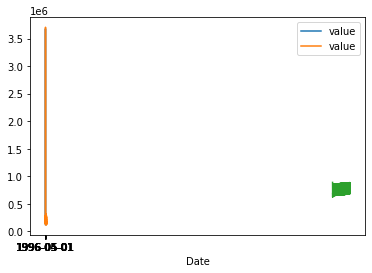

In [54]:
import matplotlib.pyplot as plt

# Convert 'time' column to string format
df_ny_long['time'] = df_ny_long['time'].dt.strftime('%Y-%m-%d')

# Create the forecast graph
fig, ax = plt.subplots()
df_ny_long[:10].plot(x='time', y='value', ax=ax)
df_ny_long[100:200].plot(x='time', y='value', ax=ax)
predictions.plot(ax=ax)

# Set the x-axis label
ax.set_xlabel('Date')

# Show the graph
plt.show()


In [88]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['value'], name='Actual'))

# Add predicted values trace
fig.add_trace(go.Scatter(x=test_data.index, y=predictions, name='Predicted'))

# Set layout options
fig.update_layout(
    title='SARIMA Time Series Forecast',
    xaxis_title='Time',
    yaxis_title='Value'
)

# Show the plot
fig.show()


# Pretty terrible!

In [94]:
df_ny_long

,Zipcode,value,time,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,,
1996-04,11373,175400.0,1996-04-01,NaN,NaN,NaN,175800.0,182800.0,172300.0,179000.0,183900.0,133700.0,191000.0
1996-04,11233,124500.0,1996-04-01,175400.0,NaN,NaN,225700.0,175800.0,182800.0,172300.0,179000.0,183900.0,133700.0
1996-04,11236,160900.0,1996-04-01,124500.0,175400.0,NaN,133200.0,225700.0,175800.0,182800.0,172300.0,179000.0,183900.0
1996-04,11372,190200.0,1996-04-01,160900.0,124500.0,175400.0,160600.0,133200.0,225700.0,175800.0,182800.0,172300.0,179000.0
1996-04,11218,177200.0,1996-04-01,190200.0,160900.0,124500.0,175400.0,160600.0,133200.0,225700.0,175800.0,182800.0,172300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04,11436,400300.0,2018-04-01,517300.0,634300.0,526100.0,414200.0,604400.0,466000.0,449400.0,967600.0,461100.0,761600.0
2018-04,11366,893600.0,2018-04-01,400300.0,517300.0,634300.0,526100.0,414200.0,604400.0,466000.0,449400.0,967600.0,461100.0
2018-04,10307,575900.0,2018-04-01,893600.0,400300.0,517300.0,634300.0,526100.0,414200.0,604400.0,466000.0,449400.0,967600.0


# Random Forest Time Series Model

Root Mean Squared Error (RMSE): 291221.3626030979


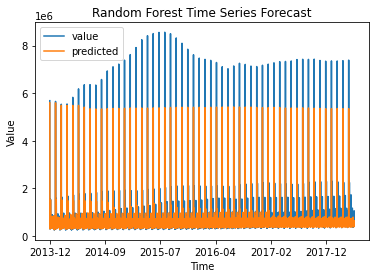

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Create lagged features
lags = 10  # Number of lagged features
for lag in range(1, lags+1):
    df_ny_long[f'lag_{lag}'] = df_ny_long['value'].shift(lag)

# Drop rows with NaN values due to the lagged features
df_ny_long.dropna(inplace=True)

# Split the data into train and test sets
train_size = int(len(df_ny_long) * 0.8)
train_data, test_data = df_ny_long[:train_size], df_ny_long[train_size:]

# Prepare the input features and target variable
X_train = train_data.drop('value', axis=1)
y_train = train_data['value']
X_test = test_data.drop('value', axis=1)
y_test = test_data['value']

# Convert datetime values to numerical representation
X_train_numeric = X_train.apply(lambda x: x.astype(np.int64) / 10**9)  # Convert to seconds
X_test_numeric = X_test.apply(lambda x: x.astype(np.int64) / 10**9)  # Convert to seconds

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_numeric, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_numeric)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the predicted and actual values
df_test = pd.DataFrame({'time': test_data.index, 'value': y_test, 'predicted': predictions})
df_test.set_index('time', inplace=True)

# Plot the results
fig, ax = plt.subplots()
df_test.plot(ax=ax)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Random Forest Time Series Forecast')
plt.legend()
plt.show()

# Hyperprameter Tuned Model

In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Set the lag order
lag_order = 3

# Feature Engineering
# Add lagged values of the target variable as additional features
for i in range(1, lag_order + 1):
    df_ny_long['lag_' + str(i)] = df_ny_long['value'].shift(i)

# Split the dataset into train and test sets
test_start_date = '2017-05-01'  # Define your test start date here
train_data = df_ny_long[df_ny_long['time'] < test_start_date]
test_data = df_ny_long[df_ny_long['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.dropna().drop(['value', 'time'], axis=1)
y_train = train_data.dropna()['value']
X_test = test_data.dropna().drop(['value', 'time'], axis=1)
y_test = test_data.dropna()['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 104123.48685824842


Root Mean Squared Error (RMSE): 104123.48685824842


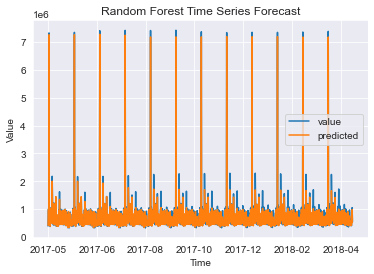

In [189]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Set the lag order
lag_order = 3

# Feature Engineering
# Add lagged values of the target variable as additional features
for i in range(1, lag_order + 1):
    df_ny_long['lag_' + str(i)] = df_ny_long['value'].shift(i)

# Split the dataset into train and test sets
test_start_date = '2017-05-01'  # Define your test start date here
train_data = df_ny_long[df_ny_long['time'] < test_start_date]
test_data = df_ny_long[df_ny_long['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.dropna().drop(['value', 'time'], axis=1)
y_train = train_data.dropna()['value']
X_test = test_data.dropna().drop(['value', 'time'], axis=1)
y_test = test_data.dropna()['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predicted and actual values
df_test = pd.DataFrame({'time': test_data.index, 'value': y_test, 'predicted': predictions})
df_test.set_index('time', inplace=True)

# Plot the results
fig, ax = plt.subplots()
df_test.plot(ax=ax)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Random Forest Time Series Forecast')
plt.legend()
plt.show()

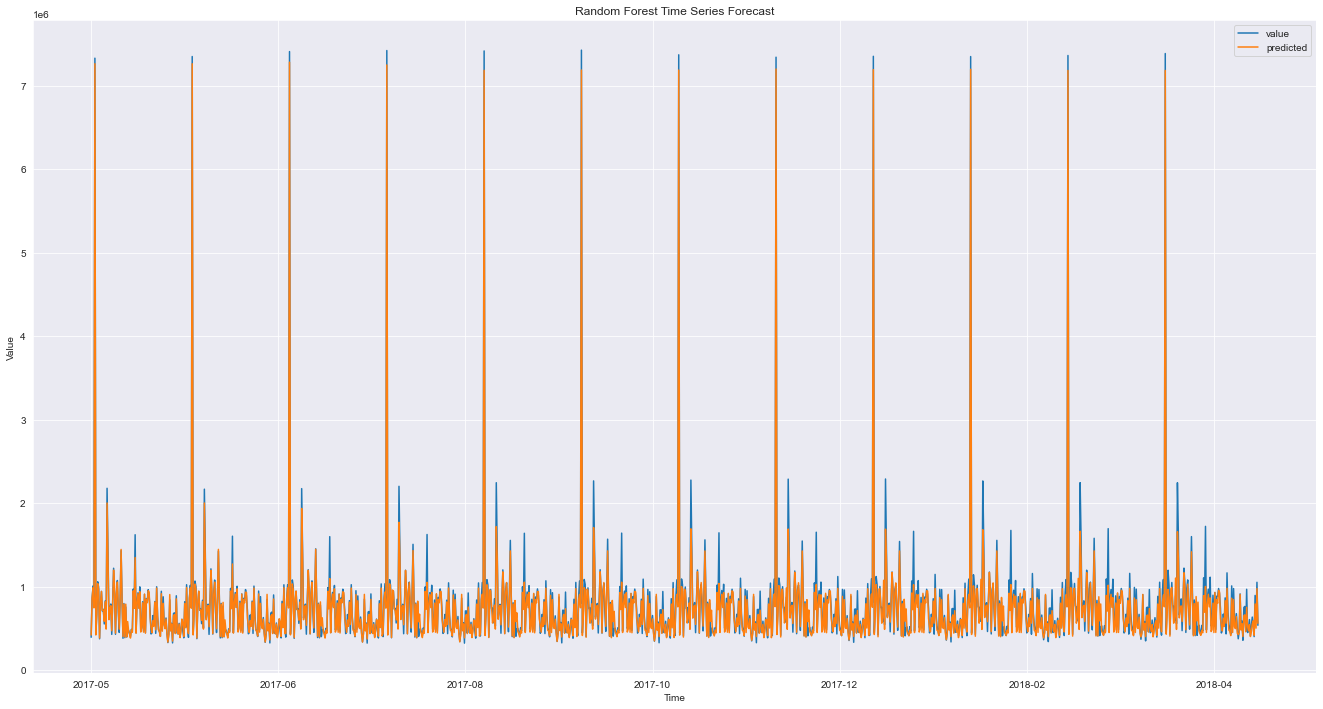

In [195]:
# Plot the predicted and actual values
df_test = pd.DataFrame({'time': test_data.index, 'value': y_test, 'predicted': predictions})
df_test.set_index('time', inplace=True)

# Plot the results
fig, ax = plt.subplots(figsize=(23, 12))
df_test.plot(ax=ax)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Random Forest Time Series Forecast')
plt.legend()
plt.show()

In [184]:
import plotly.graph_objects as go

# Filter the data for the 10128 zip code
zip_data = df_ny_long[df_ny_long['Zipcode'] == 10128]

# Split the data into train and test sets
test_start_date = '2018-05-01'  # Define your test start date here
train_data = zip_data[zip_data['time'] < test_start_date]
test_data = zip_data[zip_data['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.drop(['value', 'time'], axis=1)
y_train = train_data['value']
X_test = test_data.drop(['value', 'time'], axis=1)
y_test = test_data['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make one-step ahead predictions on the training set
predictions = []
for i in range(1, len(X_train)):
    input_data = X_train.iloc[i-1:i]  # Use the previous observation as input
    prediction = model.predict(input_data)[0]  # Make a single prediction
    predictions.append(prediction)

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=y_train[1:],
    mode='lines',
    name='Actual'
))

# Add predicted values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=predictions,
    mode='lines',
    name='Predicted'
))

# Set layout options
fig.update_layout(
    title='One-Step Ahead Forecast - 10128',
    xaxis_title='Year',
    yaxis_title='Price Growth'
)

# Show the plot
fig.show()


In [196]:
import plotly.graph_objects as go

# Filter the data for the 10128 zip code
zip_data = df_ny_long[df_ny_long['Zipcode'] == 11215]

# Split the data into train and test sets
test_start_date = '2018-05-01'  # Define your test start date here
train_data = zip_data[zip_data['time'] < test_start_date]
test_data = zip_data[zip_data['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.drop(['value', 'time'], axis=1)
y_train = train_data['value']
X_test = test_data.drop(['value', 'time'], axis=1)
y_test = test_data['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make one-step ahead predictions on the training set
predictions = []
for i in range(1, len(X_train)):
    input_data = X_train.iloc[i-1:i]  # Use the previous observation as input
    prediction = model.predict(input_data)[0]  # Make a single prediction
    predictions.append(prediction)

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=y_train[1:],
    mode='lines',
    name='Actual'
))

# Add predicted values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=predictions,
    mode='lines',
    name='Predicted'
))

# Set layout options
fig.update_layout(
    title='One-Step Ahead Forecast - 11215',
    xaxis_title='Year',
    yaxis_title='Price Growth'
)

# Show the plot
fig.show()


In [197]:
import plotly.graph_objects as go

# Filter the data for the 10128 zip code
zip_data = df_ny_long[df_ny_long['Zipcode'] == 11222]

# Split the data into train and test sets
test_start_date = '2018-05-01'  # Define your test start date here
train_data = zip_data[zip_data['time'] < test_start_date]
test_data = zip_data[zip_data['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.drop(['value', 'time'], axis=1)
y_train = train_data['value']
X_test = test_data.drop(['value', 'time'], axis=1)
y_test = test_data['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make one-step ahead predictions on the training set
predictions = []
for i in range(1, len(X_train)):
    input_data = X_train.iloc[i-1:i]  # Use the previous observation as input
    prediction = model.predict(input_data)[0]  # Make a single prediction
    predictions.append(prediction)

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=y_train[1:],
    mode='lines',
    name='Actual'
))

# Add predicted values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=predictions,
    mode='lines',
    name='Predicted'
))

# Set layout options
fig.update_layout(
    title='One-Step Ahead Forecast - 11222',
    xaxis_title='Year',
    yaxis_title='Price Growth'
)

# Show the plot
fig.show()


In [198]:
import plotly.graph_objects as go

# Filter the data for the 10128 zip code
zip_data = df_ny_long[df_ny_long['Zipcode'] == 11211]

# Split the data into train and test sets
test_start_date = '2019-05-01'  # Define your test start date here
train_data = zip_data[zip_data['time'] < test_start_date]
test_data = zip_data[zip_data['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.drop(['value', 'time'], axis=1)
y_train = train_data['value']
X_test = test_data.drop(['value', 'time'], axis=1)
y_test = test_data['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make one-step ahead predictions on the training set
predictions = []
for i in range(1, len(X_train)):
    input_data = X_train.iloc[i-1:i]  # Use the previous observation as input
    prediction = model.predict(input_data)[0]  # Make a single prediction
    predictions.append(prediction)

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=y_train[1:],
    mode='lines',
    name='Actual'
))

# Add predicted values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=predictions,
    mode='lines',
    name='Predicted'
))

# Set layout options
fig.update_layout(
    title='One-Step Ahead Forecast - 11211',
    xaxis_title='Year',
    yaxis_title='Price Growth'
)

# Show the plot
fig.show()


In [199]:
import plotly.graph_objects as go

# Filter the data for the 10128 zip code
zip_data = df_ny_long[df_ny_long['Zipcode'] == 11216]

# Split the data into train and test sets
test_start_date = '2028-05-01'  # Define your test end date here
train_data = zip_data[zip_data['time'] < test_start_date]
test_data = zip_data[zip_data['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.drop(['value', 'time'], axis=1)
y_train = train_data['value']
X_test = test_data.drop(['value', 'time'], axis=1)
y_test = test_data['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make one-step ahead predictions on the training set
predictions = []
for i in range(1, len(X_train)):
    input_data = X_train.iloc[i-1:i]  # Use the previous observation as input
    prediction = model.predict(input_data)[0]  # Make a single prediction
    predictions.append(prediction)

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=y_train[1:],
    mode='lines',
    name='Actual'
))

# Add predicted values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=predictions,
    mode='lines',
    name='Predicted'
))

# Set layout options
fig.update_layout(
    title='One-Step Ahead Forecast - 11216',
    xaxis_title='Year',
    yaxis_title='Price Growth'
)

# Show the plot
fig.show()


In [82]:
train_data

,Zipcode,value,time,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,,
1996-04,11373,175400.0,1996-04-01,NaN,NaN,NaN,175800.0,182800.0,172300.0,179000.0,183900.0,133700.0,191000.0
1996-04,11233,124500.0,1996-04-01,175400.0,NaN,NaN,225700.0,175800.0,182800.0,172300.0,179000.0,183900.0,133700.0
1996-04,11236,160900.0,1996-04-01,124500.0,175400.0,NaN,133200.0,225700.0,175800.0,182800.0,172300.0,179000.0,183900.0
1996-04,11372,190200.0,1996-04-01,160900.0,124500.0,175400.0,160600.0,133200.0,225700.0,175800.0,182800.0,172300.0,179000.0
1996-04,11218,177200.0,1996-04-01,190200.0,160900.0,124500.0,175400.0,160600.0,133200.0,225700.0,175800.0,182800.0,172300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04,11436,385300.0,2017-04-01,462000.0,603800.0,480500.0,391100.0,554100.0,428100.0,437100.0,880000.0,439000.0,674400.0
2017-04,11366,813000.0,2017-04-01,385300.0,462000.0,603800.0,480500.0,391100.0,554100.0,428100.0,437100.0,880000.0,439000.0
2017-04,10307,505400.0,2017-04-01,813000.0,385300.0,462000.0,603800.0,480500.0,391100.0,554100.0,428100.0,437100.0,880000.0


# MUCH better than the SARIMA model

In [202]:
import plotly.graph_objects as go

# Make predictions on the training data using the hypertuned model
train_predictions = best_model.predict(X_train)

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(x=train_data.index, y=y_train, name='Actual'))

# Add predicted values trace
fig.add_trace(go.Scatter(x=train_data.index, y=train_predictions, name='Predicted'))

# Set layout options
fig.update_layout(
    title='Random Forest Time Series Forecast',
    xaxis_title='Year',
    yaxis_title='Value'
)

# Show the plot
fig.show()


In [205]:
import plotly.graph_objects as go

# Filter the data for the 10128 zip code
zip_data = df_ny_long[df_ny_long['Zipcode'] == 10470]

# Split the data into train and test sets
test_start_date = '2019-05-01'  # Define your test start date here
train_data = zip_data[zip_data['time'] < test_start_date]
test_data = zip_data[zip_data['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.drop(['value', 'time'], axis=1)
y_train = train_data['value']
X_test = test_data.drop(['value', 'time'], axis=1)
y_test = test_data['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make one-step ahead predictions on the training set
predictions = []
for i in range(1, len(X_train)):
    input_data = X_train.iloc[i-1:i]  # Use the previous observation as input
    prediction = model.predict(input_data)[0]  # Make a single prediction
    predictions.append(prediction)

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=y_train[1:],
    mode='lines',
    name='Actual'
))

# Add predicted values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=predictions,
    mode='lines',
    name='Predicted'
))

# Set layout options
fig.update_layout(
    title='One-Step Ahead Forecast - 10470',
    xaxis_title='Year',
    yaxis_title='Price Growth'
)

# Show the plot
fig.show()


In [207]:
import plotly.graph_objects as go

# Filter the data for the 10128 zip code
zip_data = df_ny_long[df_ny_long['Zipcode'] == 11375]

# Split the data into train and test sets
test_start_date = '2019-05-01'  # Define your test start date here
train_data = zip_data[zip_data['time'] < test_start_date]
test_data = zip_data[zip_data['time'] >= test_start_date]

# Prepare the training and test sets
X_train = train_data.drop(['value', 'time'], axis=1)
y_train = train_data['value']
X_test = test_data.drop(['value', 'time'], axis=1)
y_test = test_data['value']

# Create and train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make one-step ahead predictions on the training set
predictions = []
for i in range(1, len(X_train)):
    input_data = X_train.iloc[i-1:i]  # Use the previous observation as input
    prediction = model.predict(input_data)[0]  # Make a single prediction
    predictions.append(prediction)

# Create a figure
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=y_train[1:],
    mode='lines',
    name='Actual'
))

# Add predicted values trace
fig.add_trace(go.Scatter(
    x=train_data['time'][1:],  # Exclude the first data point as there is no previous prediction for it
    y=predictions,
    mode='lines',
    name='Predicted'
))

# Set layout options
fig.update_layout(
    title='One-Step Ahead Forecast - 11375',
    xaxis_title='Year',
    yaxis_title='Price Growth'
)

# Show the plot
fig.show()


In [29]:
df_ny.sort_values(by=['Housing_Price_Growth']).head(5)

,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Housing_Price_Growth
97,11692,New York,NY,New York,Queens,6355,119400.0,119200.0,119300.0,119500.0,...,322000,325300,326600,327200,332300,336600,340600,349300,356700,237300.0
92,10303,New York,NY,New York,Richmond,5797,129800.0,129400.0,129000.0,128600.0,...,341000,343000,345100,348900,353900,358400,363000,368600,374500,244700.0
0,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,...,400000,407300,411600,413200,414300,413900,411400,413200,417900,265000.0
41,10473,New York,NY,New York,Bronx,686,144600.0,145000.0,145400.0,145700.0,...,387400,392200,395800,396500,397800,400500,403000,407200,411800,267200.0
39,10466,New York,NY,New York,Bronx,613,156700.0,156600.0,156500.0,156400.0,...,394400,399800,404300,407700,410400,412200,414300,419300,424300,267600.0


In [120]:
top5 = df_ny['Housing_Price_Growth'].nlargest(n=5)

p = list(top5.index)
p
top_5_price = df_ny.loc[df_ny.index[p]]

In [121]:
top_5_price

,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Housing_Price_Growth
6,10462,New York,NY,New York,Bronx,36,154300.0,154300.0,154400.0,154400.0,...,436100,439900,443500,444100,443900,446000,446400,447200,450200,295900.0
21,11385,New York,NY,New York,Queens,139,160600.0,160900.0,161300.0,161800.0,...,626100,629600,631300,631700,634200,639700,644700,651000,657500,496900.0
62,11102,New York,NY,New York,Queens,2044,168600.0,169500.0,170400.0,171400.0,...,1015800,1010800,1008000,1027500,1053700,1071500,1072700,1088200,1112100,943500.0
22,11373,New York,NY,New York,Queens,141,175400.0,175800.0,176400.0,177000.0,...,747200,754600,759800,762500,766900,773700,776100,775900,777000,601600.0
41,10473,New York,NY,New York,Bronx,686,144600.0,145000.0,145400.0,145700.0,...,387400,392200,395800,396500,397800,400500,403000,407200,411800,267200.0


In [174]:
top5

5     3709900.0
19    2018200.0
52    1571900.0
20    1490500.0
36    1452600.0
Name: Housing_Price_Growth, dtype: float64

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Zip Codes w/ Greatest Price Growth')

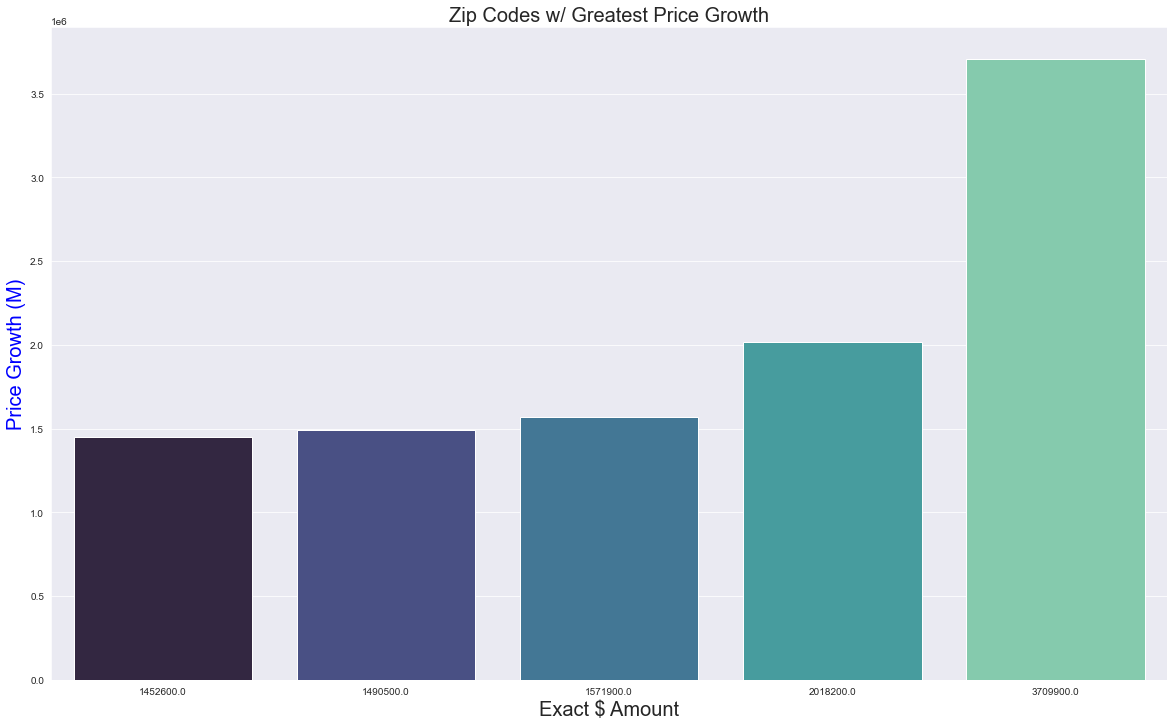

In [185]:
import seaborn as sns

x= top5
y= df_ny['Housing_Price_Growth']

fig, ax = plt.subplots(figsize=(20,12))
sns.set_style("darkgrid")


ax = sns.barplot(x, y, palette='mako')
ax.set_xlabel('Exact $ Amount', fontsize=20)
ax.set_ylabel('Price Growth (M)', color='blue', fontsize=20)
ax.set_title('Zip Codes w/ Greatest Price Growth', fontsize=20)

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'ROI for Top 5 Zipcodes')

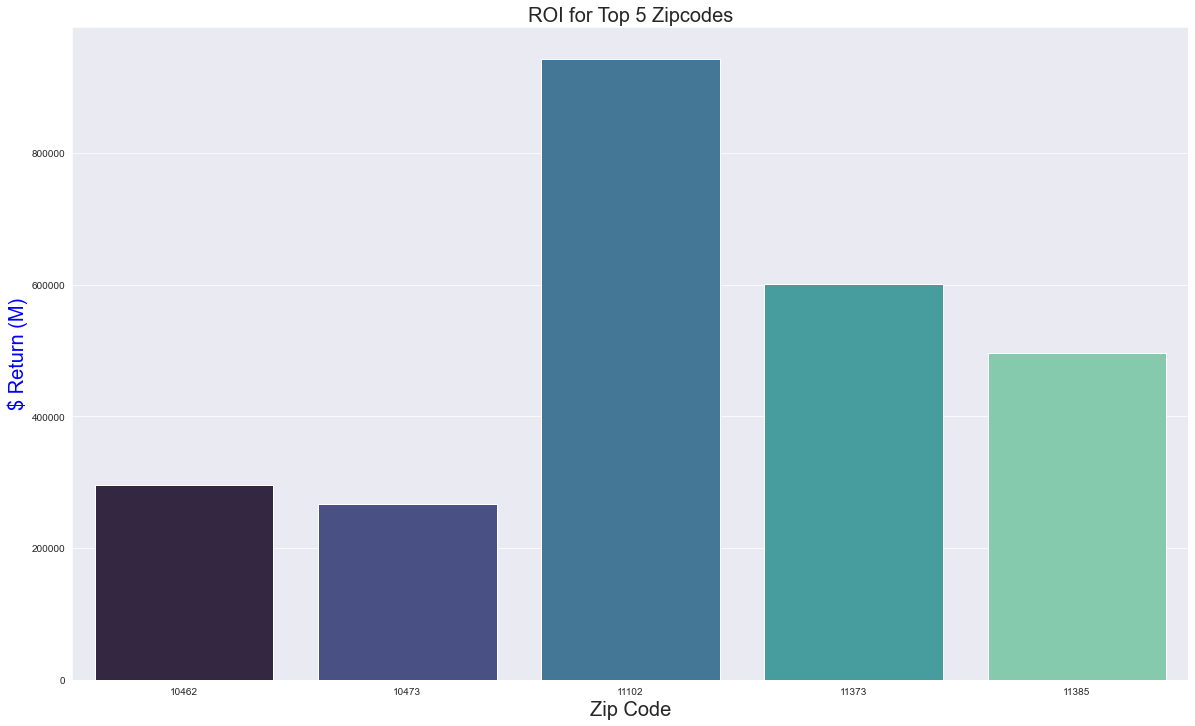

In [138]:
import seaborn as sns

x= top_5_price['Zipcode']
y= top_5_price['Housing_Price_Growth']

fig, ax = plt.subplots(figsize=(20,12))
sns.set_style("darkgrid")


ax = sns.barplot(x, y, palette='mako')
ax.set_xlabel('Zip Code', fontsize=20)
ax.set_ylabel('$ Return (M)', color='blue', fontsize=20)
ax.set_title('ROI for Top 5 Zipcodes', fontsize=20)



In [91]:
ny_best5

,Zipcode,value
time,,
1996-04-01,10467,152900.0
1996-04-01,11226,162000.0
1996-04-01,11375,252400.0
1996-04-01,11235,190500.0
1996-04-01,10128,3676700.0
...,...,...
2018-04-01,11436,400300.0
2018-04-01,11366,893600.0
2018-04-01,10307,575900.0


In [102]:
import statsmodels.api as sm

# Train-Test Split
train_data = df_ny_long[df_ny_long['Date'] < '2018-01-01']
test_data = df_ny_long[df_ny_long['Date'] >= '2018-01-01']

# Define the SARIMAX model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = sm.tsa.statespace.SARIMAX(train_data['Housing_Price_Growth'],
                                  order=order,
                                  seasonal_order=seasonal_order)

# Fit the SARIMAX model
model_fit = model.fit()

# Model Evaluation
predicted_values = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
mse = ((predicted_values - test_data['Housing_Price_Growth']) ** 2).mean()
rmse = np.sqrt(mse)

# Model Forecasting
forecasted_values = model_fit.forecast(steps=12)  # Example: Forecasting 12 future time periods

# Print evaluation metrics and forecasted values
print("Root Mean Squared Error (RMSE):", rmse)
print("Forecasted Values:", forecasted_values)


KeyError: 'Date'

In [ ]:
z

# Changed the order + seasonal order around

In [18]:
import statsmodels.api as sm

# Train-Test Split
train_data = df_ny_long[df_ny_long['Date'] < '2018-01-01']
test_data = df_ny_long[df_ny_long['Date'] >= '2018-01-01']

# Define the SARIMAX model
order = (1, 1, 4)  # (p, d, q)
seasonal_order = (2, 0, 0, 12)  # (P, D, Q, S)
model = sm.tsa.statespace.SARIMAX(train_data['Housing_Price_Growth'],
                                  order=order,
                                  seasonal_order=seasonal_order)

# Fit the SARIMAX model
model_fit = model.fit()

# Model Evaluation
predicted_values = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
mse = ((predicted_values - test_data['Housing_Price_Growth']) ** 2).mean()
rmse = np.sqrt(mse)

# Model Forecasting
forecasted_values = model_fit.forecast(steps=12)  # Example: Forecasting 12 future time periods

# Print evaluation metrics and forecasted values
print("Root Mean Squared Error (RMSE):", rmse)
print("Forecasted Values:", forecasted_values)


/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 617518.9819590912
Forecasted Values: 27248    789948.215465
27249    737509.077569
27250    791749.222372
27251    707249.062798
27252    784202.989794
27253    772687.647338
27254    841152.176187
27255    805937.031339
27256    771571.794071
27257    788060.698346
27258    804585.640720
27259    766388.666354
Name: predicted_mean, dtype: float64


/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

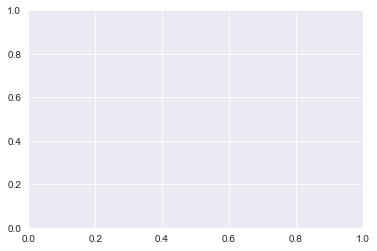

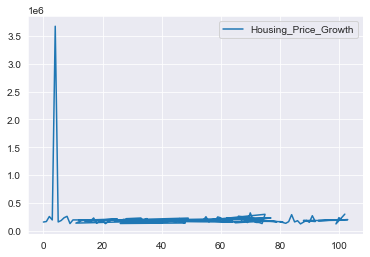

In [71]:
fig, ax = plt.subplots()
df_ny_long[['Date', 'Housing_Price_Growth']][:100].plot()
df_ny_long[['Date', 'Housing_Price_Growth']][100:200].plot()
predictions.plot()


# Advanced model

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Train-Test Split
train_data = df_ny_long[df_ny_long['Date'] < '2018-01-01']
test_data = df_ny_long[df_ny_long['Date'] >= '2018-01-01']

# Model Configuration
order = (1, 1, 2)  # (p, d, q)
seasonal_order = (1, 1, 2, 12)  # (P, D, Q, S)


# Model Training
model = sm.tsa.statespace.SARIMAX(train_data['Housing_Price_Growth'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Model Evaluation
predicted_values = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
mse = ((predicted_values - test_data['Housing_Price_Growth']) ** 2).mean()
rmse = np.sqrt(mse)

# Calculate confidence intervals (assuming normally distributed errors)
std_error = np.sqrt(model_fit.params['sigma2'])
lower_bound = predicted_values - 1.96 * std_error
upper_bound = predicted_values + 1.96 * std_error

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)


/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 618818.8018212637


/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [44]:
df_ny_train = df_ny.loc['2012-06':'2017-10',:] 
df_ny_test = df_ny.loc['2017-11':'2018-04',:] 

In [45]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming your DataFrame is named df

# Iterate over unique zip codes
for zipcode in df_ny['Zipcode'].unique():
    # Extract the data for the current zip code
    data = df_ny.loc[df_ny['Zipcode'] == zipcode, '1996-04':'2018-04'].values[0]  # Assuming the data starts from column '1996-04' and ends at '2018-04'
    
    # Perform the ADF test
    result = adfuller(data)
    
    # Extract the p-value from the test result
    p_value = result[1]
    
    # Print the p-value and the stationarity result
    print(f"Zip Code: {zipcode}")
    print(f"ADF p-value: {p_value}")
    if p_value < 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")
    print("------------------------------")

Zip Code: 10467
ADF p-value: 0.4182501355808025
The data is not stationary
------------------------------
Zip Code: 11226
ADF p-value: 0.988225486711069
The data is not stationary
------------------------------
Zip Code: 11375
ADF p-value: 0.9529539291534417
The data is not stationary
------------------------------
Zip Code: 11235
ADF p-value: 0.8106231633355593
The data is not stationary
------------------------------
Zip Code: 10128
ADF p-value: 0.9292613391446269
The data is not stationary
------------------------------
Zip Code: 10462
ADF p-value: 0.5014042101263277
The data is not stationary
------------------------------
Zip Code: 10463
ADF p-value: 0.9077529714301932
The data is not stationary
------------------------------
Zip Code: 11230
ADF p-value: 0.9735548149047931
The data is not stationary
------------------------------
Zip Code: 11209
ADF p-value: 0.7044771402246062
The data is not stationary
------------------------------
Zip Code: 11212
ADF p-value: 0.8003414457926966

Zip Code: 10303
ADF p-value: 0.6370590450139205
The data is not stationary
------------------------------
Zip Code: 11422
ADF p-value: 0.44860930773135943
The data is not stationary
------------------------------
Zip Code: 11694
ADF p-value: 0.33155072707447963
The data is not stationary
------------------------------
Zip Code: 11417
ADF p-value: 0.6361028645454574
The data is not stationary
------------------------------
Zip Code: 11427
ADF p-value: 0.5220559023647314
The data is not stationary
------------------------------
Zip Code: 11692
ADF p-value: 0.5758509315545229
The data is not stationary
------------------------------
Zip Code: 11370
ADF p-value: 0.744097623884522
The data is not stationary
------------------------------
Zip Code: 11356
ADF p-value: 0.8372013767848867
The data is not stationary
------------------------------
Zip Code: 11429
ADF p-value: 0.49231882102236263
The data is not stationary
------------------------------
Zip Code: 11362
ADF p-value: 0.7845199540485

In [47]:
df_ny.loc[:, 'Housing_Price_Growth'] = pd.to_numeric(df_ny.loc[:, 'Housing_Price_Growth'], errors='coerce')

In [48]:
df_ny.loc[:, 'Stationary_Housing_Price_Growth'] = df_ny.loc[:, 'Housing_Price_Growth'].diff()
df_ny.loc[:, 'Stationary_Housing_Price_Growth'] = df_ny.loc[:, 'Stationary_Housing_Price_Growth'].fillna(0)

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [50]:
result = adfuller(df_ny['Stationary_Housing_Price_Growth'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -7.366156650982671
p-value: 9.224929315765956e-11


In [106]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(df_ny['Stationary_Housing_Price_Growth'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Interpret the results
if result[1] < 0.05:
    print("The stationary housing price growth is stationary (reject the null hypothesis).")
else:
    print("The stationary housing price growth is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -7.446824591262719
p-value: 5.808723064272669e-11
The stationary housing price growth is stationary (reject the null hypothesis).


In [54]:
df_ny

,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Housing_Price_Growth,Stationary_Housing_Price_Growth
0,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,...,407300,411600,413200,414300,413900,411400,413200,417900,265000.0,0.0
1,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,163000.0,...,853900,870000,885100,887800,890500,901700,930700,963200,801200.0,536200.0
2,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,251200.0,...,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600,832200.0,31000.0
3,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,192000.0,...,788800,793900,796000,799700,806600,810600,813400,816200,625700.0,-206500.0
5,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,3754600.0,...,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600,3709900.0,3084200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,11436,New York,NY,New York,Queens,8009,119000.0,119400.0,119900.0,120500.0,...,381000,382500,385600,387600,388700,390600,395100,400300,281300.0,-93400.0
110,11366,New York,NY,New York,Queens,8304,231800.0,232000.0,232300.0,232800.0,...,847800,854900,859600,861700,865600,871900,882700,893600,661800.0,380500.0
111,10307,New York,NY,New York,Richmond,8388,186700.0,186800.0,186900.0,187100.0,...,527900,533800,543300,550800,559300,566900,571600,575900,389200.0,-272600.0
112,11363,New York,NY,New York,Queens,9912,295000.0,296200.0,297700.0,299400.0,...,1049800,1047900,1041200,1035400,1040700,1048600,1052100,1051300,756300.0,367100.0


In [55]:
# Identify the columns to keep as identifiers (e.g., non-date columns)
id_vars = ['Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']

# Perform the melt operation to convert to long format
df_ny_longgg = pd.melt(df_ny, id_vars=id_vars, var_name='Date', value_name='Stationary_Housing_Price_Growth')

# Sort the DataFrame by 'Date' if desired
df_ny_long.sort_values('Date', inplace=True)

/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Train-Test Split
train_data = df_ny_longgg[df_ny_longgg['Date'] < '2018-01-01']
test_data = df_ny_longgg[df_ny_longgg['Date'] >= '2018-01-01']

# Model Configuration
order = (1, 1, 2)  # (p, d, q)
seasonal_order = (1, 1, 2, 12)  # (P, D, Q, S)


# Model Training
model = sm.tsa.statespace.SARIMAX(train_data['Stationary_Housing_Price_Growth'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Model Evaluation
predicted_values = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
mse = ((predicted_values - test_data['Stationary_Housing_Price_Growth']) ** 2).mean()
rmse = np.sqrt(mse)

# Calculate confidence intervals (assuming normally distributed errors)
std_error = np.sqrt(model_fit.params['sigma2'])
lower_bound = predicted_values - 1.96 * std_error
upper_bound = predicted_values + 1.96 * std_error

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 716186.3714683519


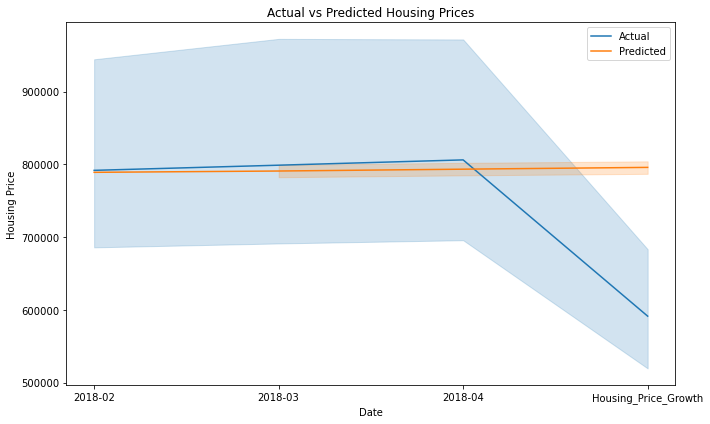

In [27]:
import seaborn as sns

# Create a DataFrame for visualization
vis_df = pd.DataFrame({'Date': test_data['Date'], 'Actual': test_data['Housing_Price_Growth'], 'Predicted': predicted_values})

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the actual and predicted values
sns.lineplot(data=vis_df, x='Date', y='Actual', label='Actual')
sns.lineplot(data=vis_df, x='Date', y='Predicted', label='Predicted')

# Set plot title and labels
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Date')
plt.ylabel('Housing Price')

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()



In [48]:
df_ny

,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Housing_Price_Growth
0,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,...,400000,407300,411600,413200,414300,413900,411400,413200,417900,265000.0
1,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,163000.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,801200.0
2,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,251200.0,...,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600,832200.0
3,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,192000.0,...,777300,788800,793900,796000,799700,806600,810600,813400,816200,625700.0
5,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,3754600.0,...,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600,3709900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,11436,New York,NY,New York,Queens,8009,119000.0,119400.0,119900.0,120500.0,...,382200,381000,382500,385600,387600,388700,390600,395100,400300,281300.0
110,11366,New York,NY,New York,Queens,8304,231800.0,232000.0,232300.0,232800.0,...,839100,847800,854900,859600,861700,865600,871900,882700,893600,661800.0
111,10307,New York,NY,New York,Richmond,8388,186700.0,186800.0,186900.0,187100.0,...,525600,527900,533800,543300,550800,559300,566900,571600,575900,389200.0
112,11363,New York,NY,New York,Queens,9912,295000.0,296200.0,297700.0,299400.0,...,1043700,1049800,1047900,1041200,1035400,1040700,1048600,1052100,1051300,756300.0


In [51]:
import numpy as np

# Calculate z-scores for the 'Housing_Price' column
z_scores = (df_ny['Housing_Price_Growth'] - df_ny['Housing_Price_Growth'].mean()) / df_ny['Housing_Price_Growth'].std()

# Set a threshold for identifying outliers (e.g., z-score greater than 3)
threshold = 3

# Create a mask to identify outliers
outlier_mask = np.abs(z_scores) > threshold

# Remove outliers from the dataset
df_ny_no_outliers = df_ny[~outlier_mask]

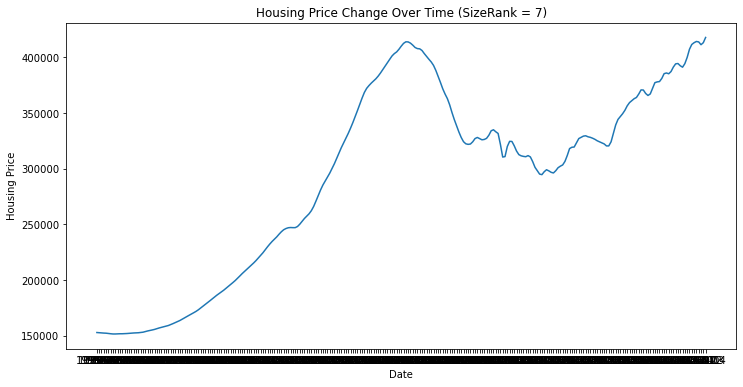

In [61]:
import matplotlib.pyplot as plt

# Sort the DataFrame by SizeRank
filtered_data = df_ny[df_ny['SizeRank'] == 7]

# Extract the relevant columns for plotting
dates = filtered_data.columns[6:-1]  # Assuming the price columns start from index 6
prices = filtered_data.iloc[0, 6:-1].values

# Plot the price change over time for the selected row
plt.figure(figsize=(12, 6))
plt.plot(dates, prices)

plt.xlabel('Date')
plt.ylabel('Housing Price')
plt.title('Housing Price Change Over Time (SizeRank = 7)')
plt.show()

# LSTM Model
- everytime i run it dies so i deleted it

# VAR Model

In [136]:
# Filter out non-date values from 'ds' column
date_mask = pd.to_datetime(df['ds'], errors='coerce').notnull()
df_filtered = df[date_mask]

# Convert 'ds' column to datetime format
df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y-%m-%d')


<ipython-input-136-fdbf23f4c75a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y-%m-%d')


/Users/mahmoud/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


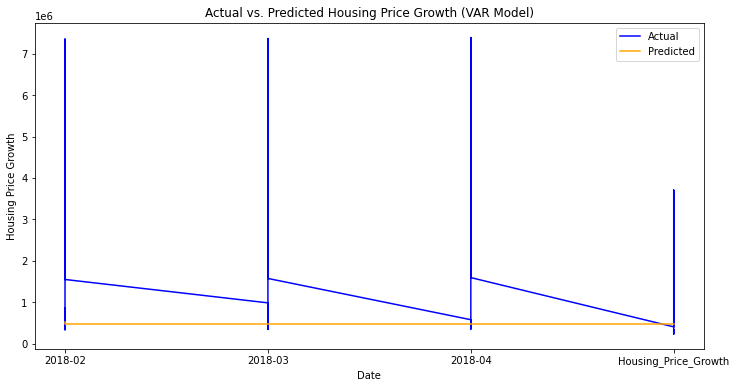

Root Mean Squared Error (RMSE): 716653.5547507725


In [140]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Remove non-numeric columns from train_data
train_data_numeric = train_data.select_dtypes(include=[np.number])

# Model Training
model = VAR(train_data_numeric)
model_fit = model.fit()

# Forecasting
lag_order = model_fit.k_ar
predicted_values = model_fit.forecast(train_data_numeric.values[-lag_order:], len(test_data))

# Model Evaluation
mse = ((predicted_values[:, 0] - test_data['Housing_Price_Growth']) ** 2).mean()
rmse = np.sqrt(mse)

# Model Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Housing_Price_Growth'], label='Actual', color='blue')
plt.plot(test_data.index, predicted_values[:, 0], label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('Housing Price Growth')
plt.title('Actual vs. Predicted Housing Price Growth (VAR Model)')
plt.legend()
plt.show()

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)

In [48]:
ny_dict.keys()

dict_keys(['10467', '11226', '11375', '11235', '10128', '10462', '10463', '11230', '11209', '11212', '11214', '11221', '11229', '11377', '11234', '11355', '10314', '11215', '11211', '11385', '11373', '11233', '11236', '11372', '11218', '11223', '11208', '11204', '11219', '11368', '11203', '11220', '11216', '11354', '10466', '11374', '10473', '11210', '11434', '11224', '10306', '11691', '10469', '10312', '10461', '11106', '11432', '11222', '11435', '11365', '11103', '11367', '11102', '10304', '10301', '11357', '10305', '11105', '10465', '11364', '11358', '11104', '11228', '11379', '11413', '11420', '11414', '10309', '11361', '11412', '10471', '11378', '11421', '11419', '11433', '11360', '10308', '11415', '11418', '11423', '11369', '10310', '10303', '11422', '11694', '11417', '11427', '11692', '11370', '11356', '11429', '11362', '11411', '10470', '11426', '10302', '11428', '11004', '11416', '11436', '11366', '10307', '11363', '10464'])

In [49]:
print('The data covers {} months.'.format(len(ny_dict['11211'])))

The data covers 265 months.


# Arima model does not work here since i have non numeric columns.

In [51]:
train_data = df_ny.loc['1996-04':'2018-04']
test_data = df_ny.loc['2012-01':]

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
# Create and fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 2))
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [55]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 113
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 226.8+ KB


In [57]:
non_numeric_columns = df_ny.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['City', 'State', 'Metro', 'CountyName'], dtype='object')


# So I will do a SARIMAX model

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
train_data = df_ny.loc['1996-04':'2018-04']
test_data = df_ny.loc['2012-01':]

In [67]:
# Convert the time period columns to datetime format
date_columns = df_ny.columns[7:]  # Assuming the date columns start from index 7
df_ny[date_columns] = df_ny[date_columns].apply(pd.to_datetime, format='%Y-%m')

# Set the index column (e.g., RegionID, Zipcode) if appropriate
# df_ny.set_index('RegionID', inplace=True)

# Convert the housing price data to numeric format
df_ny = df_ny.apply(pd.to_numeric, errors='coerce')

In [68]:
target_variable = '2018-04'  # Replace with the desired target variable column name

exogenous_variables = ['SizeRank']  # Replace with the desired exogenous variable column names

In [70]:
train_data = df_ny.loc[:, :'2017-12']
test_data = df_ny.loc[:, '2018-01':]

In [72]:
# Define the order and seasonal order for the SARIMAX model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(train_data[target_variable], exog=train_data[exogenous_variables], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

KeyError: '2018-04'

In [34]:
# Train size is 6 years and 10 months (82 months), test size is 6 months
from sklearn.model_selection import train_test_split

train, test = train_test_split(ny_dict['11211'], train_size=200)

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
ny_dict['11211'] = pd.to_numeric(ny_dict['11211'], errors='coerce')

In [38]:
model = ARIMA(train, order=(1, 1, 2))
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).